In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import roc_curve, auc

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\agarw\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [3]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

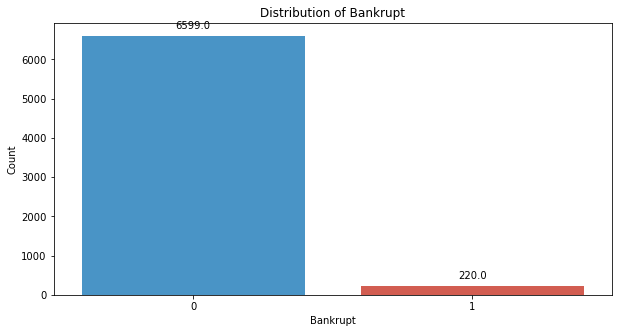

In [4]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=df['Bankrupt?'], data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [5]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [6]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

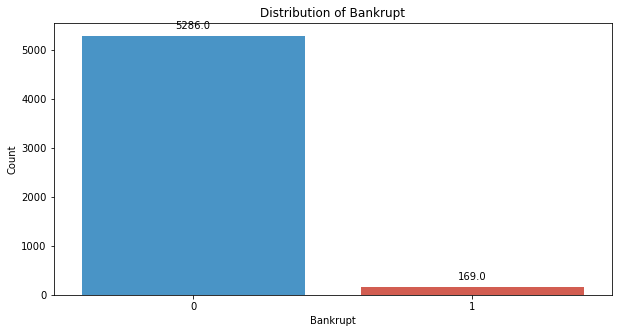

In [7]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [8]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
smote = SMOTE(sampling_strategy=0.25, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

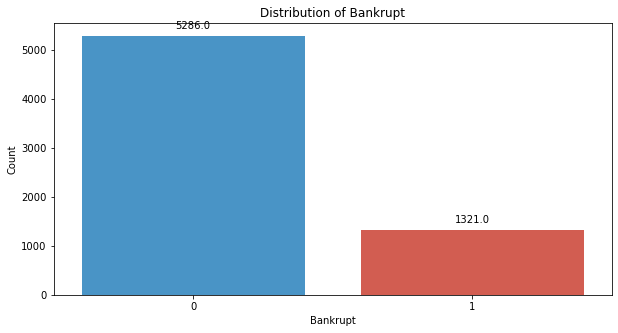

In [10]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train_resampled, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [11]:
# Standardize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
# Step 4: Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train_resampled, y_train_resampled, epochs=35, batch_size=32, verbose = 2)

Epoch 1/35
207/207 - 2s - 9ms/step - accuracy: 0.7345 - loss: 0.6299
Epoch 2/35
207/207 - 0s - 1ms/step - accuracy: 0.7928 - loss: 0.4702
Epoch 3/35
207/207 - 0s - 2ms/step - accuracy: 0.8028 - loss: 0.3787
Epoch 4/35
207/207 - 0s - 2ms/step - accuracy: 0.8134 - loss: 0.3306
Epoch 5/35
207/207 - 0s - 2ms/step - accuracy: 0.8362 - loss: 0.2996
Epoch 6/35
207/207 - 0s - 1ms/step - accuracy: 0.8403 - loss: 0.2872
Epoch 7/35
207/207 - 0s - 1ms/step - accuracy: 0.8574 - loss: 0.2676
Epoch 8/35
207/207 - 0s - 1ms/step - accuracy: 0.8532 - loss: 0.2503
Epoch 9/35
207/207 - 0s - 1ms/step - accuracy: 0.8638 - loss: 0.2467
Epoch 10/35
207/207 - 0s - 1ms/step - accuracy: 0.8865 - loss: 0.2322
Epoch 11/35
207/207 - 0s - 1ms/step - accuracy: 0.8959 - loss: 0.2200
Epoch 12/35
207/207 - 0s - 1ms/step - accuracy: 0.9051 - loss: 0.2117
Epoch 13/35
207/207 - 0s - 1ms/step - accuracy: 0.9069 - loss: 0.2062
Epoch 14/35
207/207 - 0s - 1ms/step - accuracy: 0.9087 - loss: 0.2054
Epoch 15/35
207/207 - 0s - 1m

In [15]:
y_pred_val = (model.predict(X_val) > 0.5).astype(int)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [16]:
# Evaluate the model's performance on the Validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1_value = f1_score(y_val, y_pred_val)
val_report = classification_report(y_val, y_pred_val)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.9486803519061584
Precision 0.3076923076923077
Recall 0.6
F1 Score 0.4067796610169492
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       662
           1       0.31      0.60      0.41        20

    accuracy                           0.95       682
   macro avg       0.65      0.78      0.69       682
weighted avg       0.97      0.95      0.96       682



In [17]:
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[635  27]
 [  8  12]]


In [18]:
y_pred_test = (model.predict(X_test) > 0.5).astype(int)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


In [19]:
# Evaluate the model's performance on the Validation set
val_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_value = f1_score(y_test, y_pred_test)
val_report = classification_report(y_test, y_pred_test)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.9472140762463344
Precision 0.4074074074074074
Recall 0.3548387096774194
F1 Score 0.3793103448275862
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       651
           1       0.41      0.35      0.38        31

    accuracy                           0.95       682
   macro avg       0.69      0.67      0.68       682
weighted avg       0.94      0.95      0.95       682



In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[635  16]
 [ 20  11]]


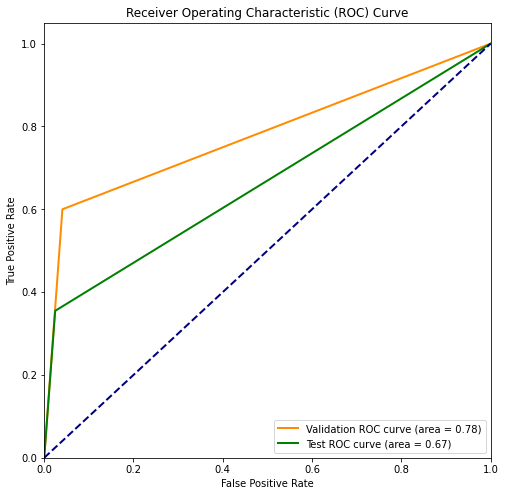

In [21]:
# Compute ROC curve and ROC area for each class
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()